In [61]:
import torch
import torchvision.transforms as transforms
import numpy as np

from PIL import Image
from torchvision.models.video import R3D_18_Weights, MViT_V2_S_Weights

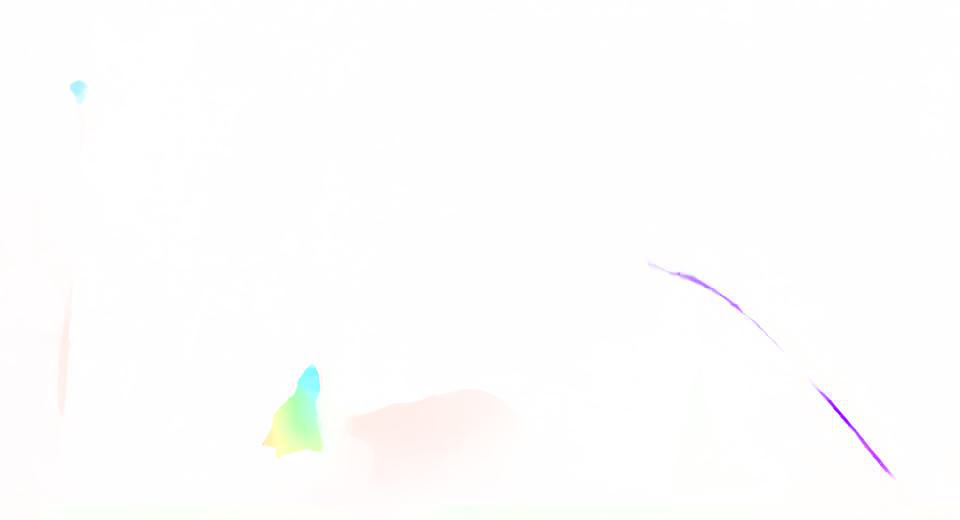

In [62]:
frame = Image.open('/Volumes/GHD/dataset/T0200079/frames/1.jpg')
frame = Image.open('./1_optical.jpg')
frame

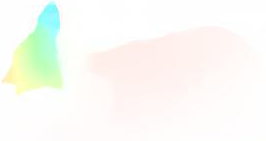

In [63]:
bbox = [
  0.2713,
  0.699,
  0.277,
  0.2703
]
width, height = frame.size
bounding_box = (
  int((bbox[0]) * width),  # x
  int((bbox[1]) * height),  # y
  int((bbox[0] + bbox[2]) * width),  # x + w
  int((bbox[1] + bbox[3]) * height),  # y + h
)
frame_cropped = frame.crop(bounding_box)
frame_cropped

In [64]:
def default_transform(preprocess):
    def transform_t(t: torch.Tensor) -> torch.Tensor:
        t = transforms.ToTensor()(t)
        t = preprocess(t.unsqueeze(0))
        t = t.squeeze()
        return t

    return transform_t

In [65]:
preprocess_r3d = default_transform(R3D_18_Weights.DEFAULT.transforms())
preprocess_mvit = default_transform(MViT_V2_S_Weights.DEFAULT.transforms())
print(R3D_18_Weights.DEFAULT.transforms())
print(MViT_V2_S_Weights.DEFAULT.transforms())

VideoClassification(
    crop_size=[112, 112]
    resize_size=[128, 171]
    mean=[0.43216, 0.394666, 0.37645]
    std=[0.22803, 0.22145, 0.216989]
    interpolation=InterpolationMode.BILINEAR
)
VideoClassification(
    crop_size=[224, 224]
    resize_size=[256]
    mean=[0.45, 0.45, 0.45]
    std=[0.225, 0.225, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


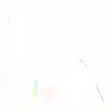

In [74]:
optical_transform = transforms.Compose([
      transforms.ToTensor(),
      # transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
      transforms.Resize((112,112))
])
frame_transformed_r3d = optical_transform(frame)
transforms.ToPILImage()((frame_transformed_r3d * 0.5 + 0.5))

tensor([[[2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         ...,
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270]],

        [[2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         ...,
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270]],

        [[2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.4270],
         [2.4270, 2.4270, 2.4270,  ..., 2.4270, 2.4270, 2.

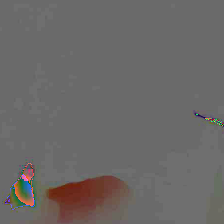

In [67]:
frame_transformed_mvit = preprocess_mvit(frame)
print(frame_transformed_mvit)
transforms.ToPILImage()(frame_transformed_mvit)

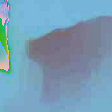

In [68]:
frame_cropped_transformed_r3d = preprocess_r3d(frame_cropped)
transforms.ToPILImage()(frame_cropped_transformed_r3d)

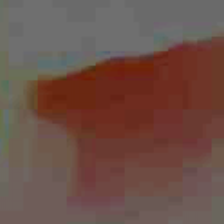

In [69]:
frame_cropped_transformed_mvit = preprocess_mvit(frame_cropped)
transforms.ToPILImage()(frame_cropped_transformed_mvit)